In [10]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

from dataset import ReferenceDataset, Tripplet
import matplotlib.pyplot as plt
import numpy as np


In [17]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


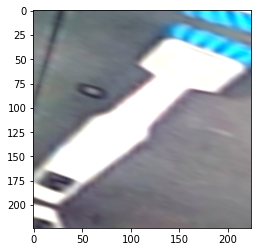

In [18]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
transform_Gauss = A.Compose(
    [
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        A.Rotate(p=0.5),
        A.Transpose(p=0.5),
        A.OpticalDistortion(p=0.5),
        A.Lambda(p=0.5),
        A.Blur(blur_limit=7, p=0.5),
        # A.Perspective(p=1)
        A.Normalize(),
        ToTensorV2(),
    ]
)

ref_dataset = ReferenceDataset(
    img_dir="cropped_ref",
    annotations_file_path="ref1_merged_with_crops.csv",
    transform=transform_Gauss,
)

triplet_dataset = Tripplet(ref_dataset)
x, y, z = triplet_dataset[0]
matplotlib_imshow(x[0])